## SOXX Analysis

In [17]:
import pandas as pd
import yfinance as yf

# Define the symbol for SOXX ETF
symbol = 'SOXX'

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 10 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=10)).strftime('%Y-%m-%d')

# Fetch historical stock data for SOXX
etf_data = yf.download(symbol, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the ETF
etf_df = pd.DataFrame(etf_data)

# Ensure the column name is corrected if necessary
etf_df.columns = [symbol]

# Add a column for the number of shares (Assuming 1000 shares for the ETF)
etf_df['Shares_SOXX'] = 1000

# Calculate the value of the ETF holdings in USD
etf_df['ETF_Value'] = etf_df[symbol] * etf_df['Shares_SOXX']

# Round the ETF value column to 2 decimal places
etf_df = etf_df.round({symbol: 2, 'ETF_Value': 2})

# Print the first few rows of the ETF DataFrame
display(etf_df.head())
display(etf_df.tail())





[*********************100%%**********************]  1 of 1 completed


,SOXX,Shares_SOXX,ETF_Value
Date,,,
2014-03-31,18.72,1000,18719.19
2014-04-01,19.02,1000,19017.52
2014-04-02,18.99,1000,18989.33
2014-04-03,19.02,1000,19017.52
2014-04-04,18.48,1000,18479.60


,SOXX,Shares_SOXX,ETF_Value
Date,,,
2024-03-22,225.45,1000,225450.00
2024-03-25,224.57,1000,224570.01
2024-03-26,222.88,1000,222880.00
2024-03-27,225.68,1000,225679.99
2024-03-28,225.92,1000,225920.00


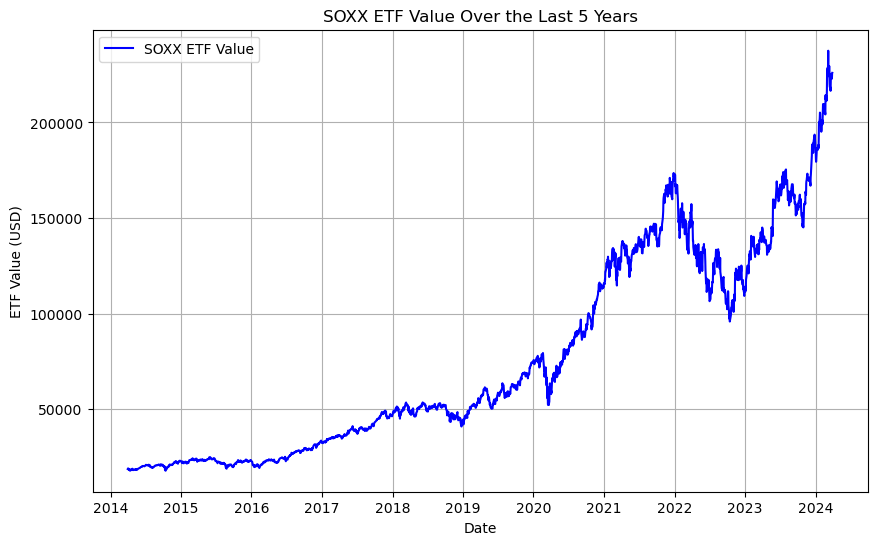

In [18]:
import matplotlib.pyplot as plt

# Plot the ETF Value for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(etf_df.index, etf_df['ETF_Value'], label='SOXX ETF Value', color='blue')
plt.title('SOXX ETF Value Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('ETF Value (USD)')
plt.legend()
plt.grid(True)
plt.show()


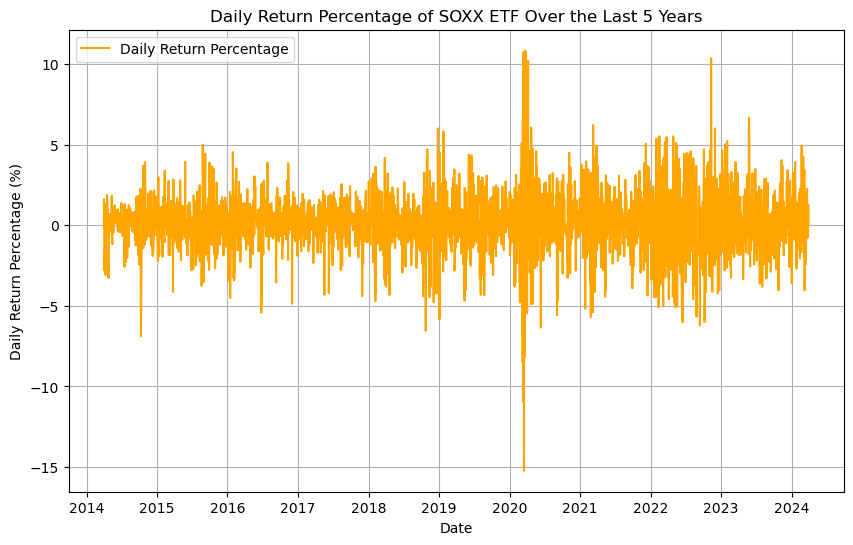

In [19]:

# Calculate daily percentage change in ETF value
etf_df['Daily_Return_Percentage'] = etf_df['ETF_Value'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(etf_df.index, etf_df['Daily_Return_Percentage'], label='Daily Return Percentage', color='orange')
plt.title('Daily Return Percentage of SOXX ETF Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
# Calculate daily percentage change in ETF value and add it as a new column
etf_df['Daily_Return_Percentage'] = etf_df['ETF_Value'].pct_change()

# Drop NaN values resulting from the calculation
etf_df.dropna(inplace=True)

# Print the first few rows of the ETF DataFrame
etf_df

,SOXX,Shares_SOXX,ETF_Value,Daily_Return_Percentage
Date,,,,
2014-04-01,19.02,1000,19017.52,0.015937
2014-04-02,18.99,1000,18989.33,-0.001482
2014-04-03,19.02,1000,19017.52,0.001485
2014-04-04,18.48,1000,18479.60,-0.028285
2014-04-07,18.31,1000,18312.82,-0.009025
...,...,...,...,...
2024-03-22,225.45,1000,225450.00,0.001199
2024-03-25,224.57,1000,224570.01,-0.003903
2024-03-26,222.88,1000,222880.00,-0.007526


In [21]:
etf_df.columns

Index(['SOXX', 'Shares_SOXX', 'ETF_Value', 'Daily_Return_Percentage'], dtype='object')

In [22]:
from tsfresh import extract_features

# Reset index to have a unique identifier for each timestamp
etf_df.reset_index(inplace=True)

# Extract features
extracted_features = extract_features(etf_df, column_id='Date')

# Print the extracted features
print(extracted_features.head())

Feature Extraction: 100%|██████████| 20/20 [00:45<00:00,  2.26s/it]


            SOXX__variance_larger_than_standard_deviation  \
2014-04-01                                            0.0   
2014-04-02                                            0.0   
2014-04-03                                            0.0   
2014-04-04                                            0.0   
2014-04-07                                            0.0   

            SOXX__has_duplicate_max  SOXX__has_duplicate_min  \
2014-04-01                      0.0                      0.0   
2014-04-02                      0.0                      0.0   
2014-04-03                      0.0                      0.0   
2014-04-04                      0.0                      0.0   
2014-04-07                      0.0                      0.0   

            SOXX__has_duplicate  SOXX__sum_values  SOXX__abs_energy  \
2014-04-01                  0.0             19.02          361.7604   
2014-04-02                  0.0             18.99          360.6201   
2014-04-03                  0.0    

In [23]:
extracted_features.head()

,SOXX__variance_larger_than_standard_deviation,SOXX__has_duplicate_max,SOXX__has_duplicate_min,SOXX__has_duplicate,SOXX__sum_values,SOXX__abs_energy,SOXX__mean_abs_change,SOXX__mean_change,SOXX__mean_second_derivative_central,SOXX__median,...,Daily_Return_Percentage__fourier_entropy__bins_5,Daily_Return_Percentage__fourier_entropy__bins_10,Daily_Return_Percentage__fourier_entropy__bins_100,Daily_Return_Percentage__permutation_entropy__dimension_3__tau_1,Daily_Return_Percentage__permutation_entropy__dimension_4__tau_1,Daily_Return_Percentage__permutation_entropy__dimension_5__tau_1,Daily_Return_Percentage__permutation_entropy__dimension_6__tau_1,Daily_Return_Percentage__permutation_entropy__dimension_7__tau_1,Daily_Return_Percentage__query_similarity_count__query_None__threshold_0.0,Daily_Return_Percentage__mean_n_absolute_max__number_of_maxima_7
2014-04-01,0.0,0.0,0.0,0.0,19.02,361.7604,NaN,NaN,NaN,19.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-02,0.0,0.0,0.0,0.0,18.99,360.6201,NaN,NaN,NaN,18.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-03,0.0,0.0,0.0,0.0,19.02,361.7604,NaN,NaN,NaN,19.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-04,0.0,0.0,0.0,0.0,18.48,341.5104,NaN,NaN,NaN,18.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-07,0.0,0.0,0.0,0.0,18.31,335.2561,NaN,NaN,NaN,18.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Remove columns with null values
extracted_features = extracted_features.dropna(axis=1)

# Remove columns with zero variance
extracted_features = extracted_features.loc[:, extracted_features.std() > 0]

extracted_features.head()

,SOXX__sum_values,SOXX__abs_energy,SOXX__median,SOXX__mean,SOXX__root_mean_square,SOXX__maximum,SOXX__absolute_maximum,SOXX__minimum,SOXX__benford_correlation,SOXX__quantile__q_0.1,...,"Daily_Return_Percentage__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Daily_Return_Percentage__fft_coefficient__attr_""real""__coeff_0","Daily_Return_Percentage__fft_coefficient__attr_""abs""__coeff_0","Daily_Return_Percentage__fft_coefficient__attr_""angle""__coeff_0",Daily_Return_Percentage__value_count__value_0,Daily_Return_Percentage__range_count__max_0__min_-1000000000000.0,Daily_Return_Percentage__range_count__max_1000000000000.0__min_0,Daily_Return_Percentage__count_above__t_0,Daily_Return_Percentage__count_below__t_0
2014-04-01,19.02,361.7604,19.02,19.02,19.02,19.02,19.02,19.02,0.864123,19.02,...,0.004371,0.003091,0.015937,0.015937,0.0,0.0,0.0,1.0,1.0,0.0
2014-04-02,18.99,360.6201,18.99,18.99,18.99,18.99,18.99,18.99,0.864123,18.99,...,-0.000407,-0.000287,-0.001482,0.001482,180.0,0.0,1.0,0.0,0.0,1.0
2014-04-03,19.02,361.7604,19.02,19.02,19.02,19.02,19.02,19.02,0.864123,19.02,...,0.000407,0.000288,0.001485,0.001485,0.0,0.0,0.0,1.0,1.0,0.0
2014-04-04,18.48,341.5104,18.48,18.48,18.48,18.48,18.48,18.48,0.864123,18.48,...,-0.007758,-0.005486,-0.028285,0.028285,180.0,0.0,1.0,0.0,0.0,1.0
2014-04-07,18.31,335.2561,18.31,18.31,18.31,18.31,18.31,18.31,0.864123,18.31,...,-0.002475,-0.001750,-0.009025,0.009025,180.0,0.0,1.0,0.0,0.0,1.0


In [25]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

# Fetch historical data for SOXX ETF
etf_df = yf.download('SOXX', start='2010-01-01', end='2020-12-31')

# Calculate daily returns for SOXX ETF
etf_df['Daily_Return_Percentage'] = etf_df['Adj Close'].pct_change() * 100

# Feature Extraction: Create features based on previous day's returns, and rolling mean and std deviation of returns
etf_df['Previous_Return'] = etf_df['Daily_Return_Percentage'].shift(1)
etf_df['Rolling_Mean'] = etf_df['Daily_Return_Percentage'].rolling(window=7).mean()
etf_df['Rolling_Std'] = etf_df['Daily_Return_Percentage'].rolling(window=7).std()

# Drop NaN values resulting from rolling calculations and lagged values
etf_df.dropna(inplace=True)

# Define the testing days (every 5th day)
testing_days = etf_df.index[::5]

# Split data into training and testing sets based on testing days
train_df_soxx = etf_df[~etf_df.index.isin(testing_days)]
test_df_soxx = etf_df[etf_df.index.isin(testing_days)]

# Prepare data for machine learning: Define features and target variable
X_train = train_df_soxx[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_train = train_df_soxx['Daily_Return_Percentage']
X_test = test_df_soxx[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_test = test_df_soxx['Daily_Return_Percentage']

# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate and print the R^2 score to evaluate model performance
r2_score = model.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Evaluate the model by calculating and printing the mean absolute error (MAE)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Predict future daily return percentages for the next 30 days using the trained model
last_features = X_train.tail(1)
next_30_days = pd.date_range(start=etf_df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
future_features = pd.DataFrame(index=next_30_days, columns=X_train.columns)
future_features.iloc[0] = last_features.values[0]

# Generate future features for prediction: Use the last known return and simulate the next 29 days
for i in range(1, 30):
    future_features.iloc[i] = np.concatenate(([future_features.iloc[i - 1][0]], np.random.rand(2)))

# Predict future returns using the linear regression model
future_predictions = model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(future_predictions)



[*********************100%%**********************]  1 of 1 completed

R^2 Score: 0.11566633097145285
Mean Absolute Error: 1.092303398506495
Future Predictions for the next 30 days:
[-3.12696826e-01  6.85160906e-01  4.42962778e-01  8.49999109e-01
  6.88680005e-02  3.30205031e-01  1.09387688e+00  8.89554042e-01
  5.21758814e-01  1.11922422e+00  5.53676162e-01 -5.75403803e-02
  3.83430814e-01  7.18599642e-01  4.25354830e-01  1.03708412e+00
  6.77672357e-01  2.05544575e-01  3.19030638e-01  9.44914829e-02
  6.47448426e-01  2.01174685e-04  3.52476431e-01  2.01243600e-02
  1.10061143e+00  4.10441497e-01  9.56485918e-01  5.42892886e-01
 -1.89131511e-03  1.05014150e-01]


In [26]:
future_predictions

array([-3.12696826e-01,  6.85160906e-01,  4.42962778e-01,  8.49999109e-01,
        6.88680005e-02,  3.30205031e-01,  1.09387688e+00,  8.89554042e-01,
        5.21758814e-01,  1.11922422e+00,  5.53676162e-01, -5.75403803e-02,
        3.83430814e-01,  7.18599642e-01,  4.25354830e-01,  1.03708412e+00,
        6.77672357e-01,  2.05544575e-01,  3.19030638e-01,  9.44914829e-02,
        6.47448426e-01,  2.01174685e-04,  3.52476431e-01,  2.01243600e-02,
        1.10061143e+00,  4.10441497e-01,  9.56485918e-01,  5.42892886e-01,
       -1.89131511e-03,  1.05014150e-01])

In [27]:
etf_df 

,Open,High,Low,Close,Adj Close,Volume,Daily_Return_Percentage,Previous_Return,Rolling_Mean,Rolling_Std
Date,,,,,,,,,,
2010-01-13,16.113333,16.256666,15.776667,16.206667,10.113482,342600,1.165225,-3.494001,-0.339093,1.625176
2010-01-14,16.176666,16.196667,16.010000,16.176666,10.094757,424200,-0.185143,1.165225,-0.342605,1.624752
2010-01-15,16.166668,16.166668,15.610000,15.650000,9.766105,491400,-3.255674,-0.185143,-0.764627,1.961143
2010-01-19,15.666667,15.866667,15.666667,15.830000,9.878428,397800,1.150139,-3.255674,-0.487997,2.089923
2010-01-20,15.760000,15.840000,15.623333,15.830000,9.878428,916200,0.000000,1.150139,-0.702815,1.921580
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,124.413330,124.616669,123.166664,123.273331,113.056717,1257000,-0.751442,-0.147384,-0.043292,0.719210
2020-12-24,123.930000,124.430000,123.556664,124.373337,114.065544,574200,0.892320,-0.751442,-0.114893,0.559556
2020-12-28,125.833336,125.900002,124.053329,124.236664,113.940208,1108500,-0.109880,0.892320,-0.138946,0.554457


In [28]:
etf_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Daily_Return_Percentage', 'Previous_Return', 'Rolling_Mean',
       'Rolling_Std'],
      dtype='object')

In [29]:
from prophet import Prophet



# Calculate daily percentage change in ETF portfolio value
etf_df['Daily_Return_Percentage'] = etf_df['Adj Close'].pct_change() * 100

# Drop NaN values resulting from the calculation
etf_df.dropna(inplace=True)

# Prepare data for Prophet
# Prophet expects the dataframe to have a column 'ds' for dates and 'y' for the values we wish to forecast
prophet_df = etf_df.reset_index()[['Date', 'Daily_Return_Percentage']].rename(columns={'Date': 'ds', 'Daily_Return_Percentage': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame with future dates for the next 30 days
future_dates = model.make_future_dataframe(periods=30)

# Make predictions using the fitted model
forecast = model.predict(future_dates)

# Extract the predicted values for the next 30 days
predicted_values = forecast[['ds', 'yhat']].tail(30)




14:22:51 - cmdstanpy - INFO - Chain [1] start processing
14:22:51 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
# Display predicted return percentage values for the next 30 days (Prophet)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
2760,2020-12-31,0.225892,-1.935748,2.369663
2761,2021-01-01,0.203269,-1.891903,2.387958
2762,2021-01-02,0.176639,-1.864075,2.587527
2763,2021-01-03,0.182106,-1.707623,2.255829
2764,2021-01-04,0.273358,-2.037099,2.345788
2765,2021-01-05,0.420314,-1.736563,2.474151
2766,2021-01-06,0.384550,-1.854393,2.660468
2767,2021-01-07,0.248141,-1.842551,2.292515
2768,2021-01-08,0.211121,-1.949358,2.257747
2769,2021-01-09,0.169702,-2.075499,2.214152


In [31]:
# Convert the future_predictions array to a DataFrame
future_predictions_df = pd.DataFrame(future_predictions, columns=['LR_Predictions'])

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Set the index of the future_predictions_df DataFrame to match the index of the predicted_values DataFrame
future_predictions_df.index = predicted_values.index

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Print the combined predictions DataFrame
combined_predictions_df.tail(30)

,ds,yhat,LR_Predictions
2760,2020-12-31,0.225892,-0.312697
2761,2021-01-01,0.203269,0.685161
2762,2021-01-02,0.176639,0.442963
2763,2021-01-03,0.182106,0.849999
2764,2021-01-04,0.273358,0.068868
2765,2021-01-05,0.420314,0.330205
2766,2021-01-06,0.384550,1.093877
2767,2021-01-07,0.248141,0.889554
2768,2021-01-08,0.211121,0.521759
2769,2021-01-09,0.169702,1.119224


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Calculate the R^2 score of the model on the testing data
r2_score = rf_model.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Make predictions for future dates
rf_predictions = rf_model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(rf_predictions)

R^2 Score: 0.13085335123215602
Mean Absolute Error: 1.1020575569636932
Future Predictions for the next 30 days:
[-0.09767882  0.87627236  0.33172166  0.97028458  0.03097537  0.42799436
  0.87858684  0.735214    0.64630065  0.82088015  0.46919857  0.28081628
  0.51552772  0.76346881  0.29915884  0.98351549  0.98406244  0.29881111
  0.28576899  0.2102062   0.92379755  0.17806838  0.41128837  0.44353411
  0.84191843  0.69840939  0.79033637  0.42963709  0.23924848  0.33979758]


In [33]:
# Convert the future_predictions array to a DataFrame for Random Forest predictions
rf_predictions_df = pd.DataFrame(rf_predictions, index=future_predictions_df.index, columns=['RF_Predictions'])

# Concatenate the Prophet predictions DataFrame with the Random Forest predictions DataFrame
combined_predictions_df = pd.concat([combined_predictions_df, rf_predictions_df], axis=1)

# Print the updated combined predictions DataFrame
combined_predictions_df.tail(30)

,ds,yhat,LR_Predictions,RF_Predictions
2760,2020-12-31,0.225892,-0.312697,-0.097679
2761,2021-01-01,0.203269,0.685161,0.876272
2762,2021-01-02,0.176639,0.442963,0.331722
2763,2021-01-03,0.182106,0.849999,0.970285
2764,2021-01-04,0.273358,0.068868,0.030975
2765,2021-01-05,0.420314,0.330205,0.427994
2766,2021-01-06,0.384550,1.093877,0.878587
2767,2021-01-07,0.248141,0.889554,0.735214
2768,2021-01-08,0.211121,0.521759,0.646301
2769,2021-01-09,0.169702,1.119224,0.820880
